In [1]:
import numpy as np
import pandas as pd

In [2]:
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_score, recall_score,  accuracy_score, precision_recall_curve

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam



In [4]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

In [5]:

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt

import scipy

import warnings
warnings.filterwarnings('ignore')

import re
from collections import Counter
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

In [7]:
df = train.append(test, sort = False) #getting all together.

In [8]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [9]:
df.describe()

,UserName,ScreenName
count,44955.000000,44955.000000
mean,22478.000000,67430.000000
std,12977.535012,12977.535012
min,1.000000,44953.000000
25%,11239.500000,56191.500000
50%,22478.000000,67430.000000
75%,33716.500000,78668.500000
max,44955.000000,89907.000000


In [10]:
duplicatedRow = df[df.duplicated()]
print(duplicatedRow[:5]) #remove dublicated rows

Empty DataFrame
Columns: [UserName, ScreenName, Location, TweetAt, OriginalTweet, Sentiment]
Index: []


In [11]:
df.shape

(44955, 6)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [13]:
display(train.isnull().sum().sort_values(ascending=False))

Location         8590
Sentiment           0
OriginalTweet       0
TweetAt             0
ScreenName          0
UserName            0
dtype: int64

In [14]:
df['Location'].fillna(value='unknown', inplace=True) #filling missing values

In [15]:
encoding = {'Extremely Negative': 'Negative',
            'Extremely Positive': 'Positive'
           }

labels = ['Negative', 'Positive']
           

df['Sentiment'].replace(encoding, inplace=True) #less label

In [16]:
df["sentiment"] = LabelEncoder().fit_transform(df["Sentiment"])
display(df[["Sentiment", "sentiment"]].head(5))

,Sentiment,sentiment
0,Neutral,1
1,Positive,2
2,Positive,2
3,Positive,2
4,Negative,0


In [17]:
df['CleanTweet'] = df['OriginalTweet'].copy()
display(df.head(5))

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment,CleanTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,2,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,2,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,unknown,16-03-2020,My food stock is not the only one which is emp...,Positive,2,My food stock is not the only one which is emp...
4,3803,48755,unknown,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0,"Me, ready to go at supermarket during the #COV..."


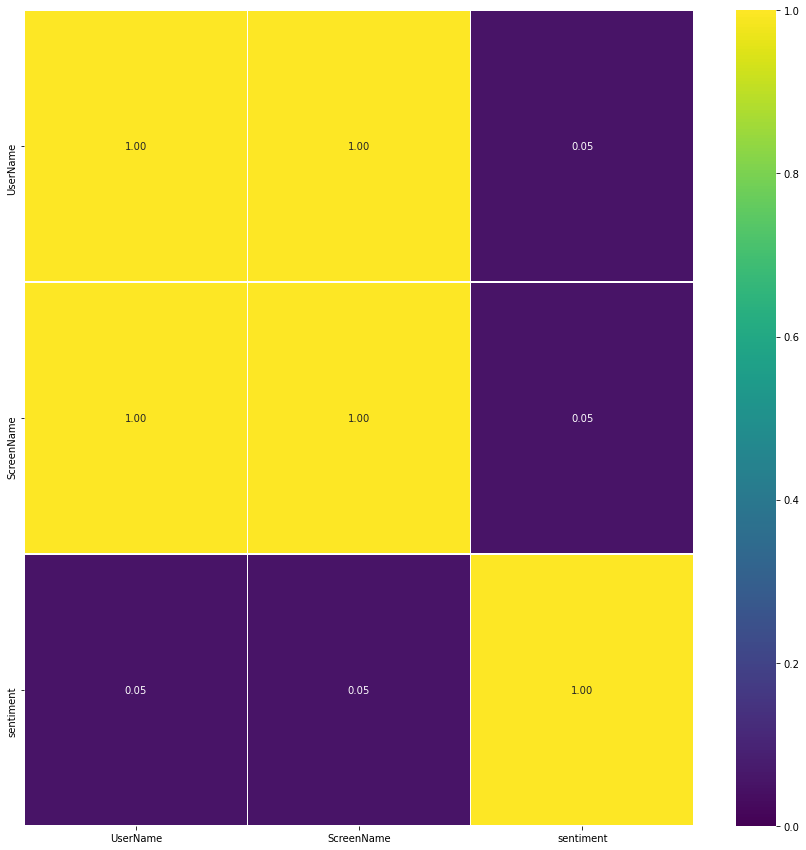

In [18]:
a = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(a, linewidth=.5, annot=True, fmt=".2f", annot_kws={"size":10}, cmap="viridis", vmin =0, vmax=1)

# Text Cleaning

In [19]:
def before_lowercase(tweet):
    tweet = re.sub(r" usa ", " America ", tweet)
    tweet = re.sub(r" USA ", " America ", tweet)
    tweet = re.sub(r" u s ", " America ", tweet)
    tweet = re.sub(r" uk ", " England ", tweet)
    tweet = re.sub(r" UK ", " England ", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"the US", "America", tweet)
    tweet = re.sub(r"Coronavirus", " covid ", tweet)
    tweet = re.sub(r"Covid19", " covid ", tweet)
    return str(tweet)
#before lowercase I replaced some important words.

In [20]:
df['CleanTweet'] = df['CleanTweet'].apply(before_lowercase)
display(df['CleanTweet'].head(5))

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2     covid  Australia: Woolworths to give elderly,...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
Name: CleanTweet, dtype: object

# Remove URL

In [21]:
# Function for url's
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'link', text)

from bs4 import BeautifulSoup
#Function for removing html
def html(text):
    return BeautifulSoup(text, "lxml").text

In [22]:
df['CleanTweet'] = df['CleanTweet'].apply(remove_urls)
df['CleanTweet'] = df['CleanTweet'].apply(html)


# Lowercase

In [23]:
df['CleanTweet'] = df['CleanTweet'].str.lower()
display(df['CleanTweet'].head(5))

0    @menyrbie @phil_gahan @chrisitv link and link ...
1    advice talk to your neighbours family to excha...
2    covid  australia: woolworths to give elderly, ...
3    my food stock is not the only one which is emp...
4    me, ready to go at supermarket during the #cov...
Name: CleanTweet, dtype: object

In [24]:
char_list = ["don", "ain", "ain't", "aren", "arent", "aren't", "cannot", "cant", "can't", "couldn", "couldnt", "couldn't", "didn",
               "didn't", "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn", "hasnt", "hasn't", "haven", "haven't", "mightn", "mightn't",
               "isn", "isn't",  "mustn", "mustn't", "needn", "needn't", "nt", "shouldn", "shouldn't",  "wasn", "wasnt", "wasn't", "don't"]

def before_lowercase(tweet0):
    tweet0 =  re.sub(r"|".join(char_list), "not", tweet0) 
    return str(tweet0)

df['CleanTweet'] = df['CleanTweet'].apply(before_lowercase)
display(df['CleanTweet'].head(15))

0     @menyrbie @phil_gahan @chrisitv link and link ...
1     advice talk to your neighbours family to excha...
2     covid  australia: woolworths to give elderly, ...
3     my food stock is not the only one which is emp...
4     me, ready to go at supermarket during the #cov...
5     as news of the regionâs first confirmed covid...
6     cashier at grocery store was sharing his insig...
7     was at the supermarket today. not't buy toilet...
8     due to covid-19 our retail store and classroom...
9     for corona prevenotion,we should stop to buy t...
10    all monoth there not't been crowding in the su...
11    due to the covid-19 situation, we have increas...
12    #horningsea is a caring community. letâs all ...
13    me: i not't need to stock up on food, i'll jus...
14    adara releases covid-19 resource cenoter for t...
Name: CleanTweet, dtype: object

# Converting Emojis&Emoticons into Word

In [25]:
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
    return text

In [26]:
# Function for converting emoticons into word
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text
# Example
text = "Hello :-) :-)"
convert_emoticons(text)

'Hello Happy_face_smiley Happy_face_smiley'

In [27]:
df['CleanTweet'] = df['CleanTweet'].apply(convert_emojis)
df['CleanTweet'] = df['CleanTweet'].apply(convert_emoticons)
display(df['CleanTweet'].head(15))

0     @menyrbie @phil_gahan @chrisitv link and link ...
1     advice talk to your neighbours family to excha...
2     covid  australia: woolworths to give elderly, ...
3     my food stock is not the only one which is emp...
4     me, ready to go at supermarket during the #cov...
5     as news of the regionâs first confirmed covid...
6     cashier at grocery store was sharing his insig...
7     was at the supermarket today. not't buy toilet...
8     due to covid-19 our retail store and classroom...
9     for corona prevenotion,we should stop to buy t...
10    all monoth there not't been crowding in the su...
11    due to the covid-19 situation, we have increas...
12    #horningsea is a caring community. letâs all ...
13    me: i not't need to stock up on food, i'll jus...
14    adara releases covid-19 resource cenoter for t...
Name: CleanTweet, dtype: object

# Stopwords

I created my own stopword list.

In [28]:
my_stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", 
                     "across", "act", "actually", "ad", "added", "adj", "ae", "af", "after", "afterwards", "ag", "again", "ah", "aj", "al", "all",
                      "also", "although", "always", "am", "among", "amongst", "amoungst",  "an", "and", "announce", 
                      "ao", "ap", "apparently", "appear",  "appropriate", "to",
                     "approximately", "ar", "are",  "arise", "around", "as", "a's", "aside",  "associated", "at", "au", "auth", "av",  "aw", "away", "ax", "ay", 
                     "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning",
                     "beginnings", "begins", "behind", "being",  "below", "beside", "besides", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", 
                     "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came",  "cc", "cd", "ce", 
                      "cf", "cg", "ch", "ci", "cit", "cj", "cl", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently",
                     "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently",
                     "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did",  "different", "dj",
                     "dk", "dl", "do", "does", "doing", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", 
                     "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "entirely", "eo", "ep", "eq",
                     "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "ey", "f", "f2",
                     "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows",
                     "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", 
                     "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", 
                     "h3", "had", "happens", "hardly", "has",  "have",  "having", "he", "hed", "he'd", "he'll", "hello", "hence", "her", "here", "hereafter", "hereby", "herein", "heres",
                     "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho",  "hopefully", "how", "howbeit", "however", 
                     "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig",  "ih", "ii", "ij",
                     "il", "i'll", "im", "i'm", "in", "inasmuch", "inc", "index", "indicate", "indicated", "indicates", "inner", "insofar", "interest", "into", "invention",
                     "inward", "io", "ip", "iq", "ir", "is",  "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", 
                     "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely",  "lately", "later", "latter", "latterly", "lb", "lc",
                     "le", "les", "lest", "let", "lets", "let's", "lf", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd",
                     "m", "m2", "ma", "made", "mainly", "make", "makes", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "mill", "million", "mine", 
                     "ml", "mn", "mo", "more", "moreover", "move", "mr", "mrs", "ms", "mt", "mu", "mug",  "my", "myself", "n", "n2", "na", "name", "namely", "nay", 
                     "nc", "nd", "ne", "near", "nearly","new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "nos", "noted",  "novel", "now", "nr", "ns",  "ny", "o", "oa", "ob", 
                     "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ol", "old", "om", "omitted", "on", "once", "one", "ones",  "onto", 
                     "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others",  "ou", "ought", "our", "ours", "ourselves",  "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2",
                     "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "pf", "ph", "pi", "pj", "pk", "pl", "placed", 
                      "plus", "pm", "pn", "po", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously",  "promptly", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que",
                      "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily",  "ref", "refs", "regarding",  "related", "relatively", "research-articl", "respectively",
                      "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says",
                     "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", 
                     "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should",  "should've",  "si", "side", "significant",
                     "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone",
                     "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st",
                      "sub", "substantially", "sup", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th",  "that",
                     "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein",
                     "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've",
                     "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", 
                     "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to",  "too", "took", "top", "toward", "towards", "tp", "tq", "tr",  "ts", "t's", "tt", "tv", "twelve", "twenty",
                     "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used",  "uses", "using","ut",
                     "v", "va", "value", "various", "vd", "ve", "ve",  "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was",  "way", "we", 
                     "wed", "we'd",  "went", "were", "we're",  "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter",
                     "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll",
                     "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "with", "within",  "wo",  "words", "world", "would",  "www", "x", "x1", "x2",
                     "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours",
                     "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",',', '.', '"', ':', ')', '(', '!', '?', '|', ';', "'", '$', '&','/', '[', ']', '>', '%', '=', '#', '*', '+', 
                '\\', '•',  '~', '@', '£', '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›', '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', '−', 
                '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', 
                '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', '¼', '⊕', '▼', 
                '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲',
                'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', 
                '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
                '¹', '≤', '‡', '√', '«', '»', '´', 'º', '¾', '¡', '§', '£', '₤']
# for adding multiple words
print(len(my_stopwords))

1092


In [29]:

def remove_swords(text,s_list):
    a=[]
    for s in text.split():
        if s not in my_stopwords:
            a.append(s)
            #remove_swords(text ,my_stopwords)
    return a     


In [30]:
b=[]
for t in df['CleanTweet']:
    
    b.append(remove_swords(t ,my_stopwords))
    


In [31]:
df['CleanTweet2'] = b

In [32]:
df['CleanTweet2'].head()

0    [@menyrbie, @phil_gahan, @chrisitv, link, link...
1    [advice, talk, neighbours, family, exchange, p...
2    [covid, australia:, woolworths, elderly,, disa...
3    [food, stock, not, only, empty..., please,, no...
4    [me,, ready, supermarket, #covid19, outbreak.,...
Name: CleanTweet2, dtype: object

In [33]:
# 2.8 Combine individual words
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanTweet'] = df['CleanTweet2'].apply(combine_text)
df['CleanTweet']

0          @menyrbie @phil_gahan @chrisitv link link link
1       advice talk neighbours family exchange phone n...
2       covid australia: woolworths elderly, disabled ...
3       food stock not only empty... please, not't pan...
4       me, ready supermarket #covid19 outbreak. not p...
                              ...                        
3793    supermarket israel -- people dance sing togeth...
3794    panic buy lot non-perishable items? echo needs...
3795    asst prof economics @cconces @nbcphiladelphia ...
3796    gov need somethings instead biar je rakyat ass...
3797    @forestandpaper members committed safety emplo...
Name: CleanTweet, Length: 44955, dtype: object

# Remove Special Characters

In [35]:
def clean(tweet): 
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
       
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    
    tweet = re.sub(r"åÇ", "", tweet)
    
    tweet = re.sub(r"åÀ", "", tweet)
    tweet = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'mentioned', tweet)
    tweet = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'referance', #Replace URLs with 'httpaddr'
                     tweet)
    tweet = re.sub(r'£|\$', 'money', tweet) #Replace money symbols with 'moneysymb'
    tweet = re.sub(r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', #Replace phone numbers with 'numbers'
                   ' ', tweet)
    tweet = re.sub(r'\d+(\.\d+)?', ' ', tweet)  #Replace numbers with 'numbr'
    tweet = re.sub(r'[^\w\d\s]', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = re.sub(r'^\s+|\s+?$', '', tweet.lower())
    
    
    # Contractions
   
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"luv", "love", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
   
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
  
   
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
   
    tweet = re.sub(r"e-mail", "email", tweet)
    tweet = re.sub(r"\s{2,}", " ", tweet)
    tweet = re.sub(r"quikly", "quickly", tweet)
    
    
    
    tweet = re.sub(r" iPhone ", " phone ", tweet)
    tweet = re.sub(r"\0rs ", " rs ", tweet) 
    
    tweet = re.sub(r"ios", "operating system", tweet)
  
    tweet = re.sub(r"programing", "programming", tweet)
    tweet = re.sub(r"bestfriend", "best friend", tweet)
    
    
    tweet = re.sub(r" J K ", " JK ", tweet)
    tweet = re.sub(r"coronavirus", " covid19", tweet)
    tweet = re.sub(r"covid", " covid19", tweet)
    tweet = re.sub(r"corrona", " covid19 ", tweet)
    tweet = re.sub(r"covid1919", " covid19 ", tweet)
    tweet = re.sub(r"_", "  ", tweet)
    
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ') 
        
    
        
        
    return str(tweet)

In [36]:
df['CleanTweet'] = df['CleanTweet'].apply(clean)
display(df['CleanTweet'].head(15))

0          menyrbie phil  gahan chrisitv link link link
1     advice talk neighbours family exchange phone n...
2      covid19 australia woolworths elderly disabled...
3     food stock not only empty please not t panic e...
4     me ready supermarket  covid19 outbreak not par...
5     news regionâ s confirmed  covid19 case out sul...
6     cashier grocery store sharing insights  covid1...
7     supermarket today not t buy toilet paper rebel...
8      covid19 retail store classroom atlanota not o...
9     corona prevenotion we stop buy things cash onl...
10    monoth not t crowding supermarkets restauranot...
11     covid19 situation increased demand food produ...
12    horningsea caring community letâ s less capabl...
13    me not t need stock food just amazon deliver n...
14    adara releases  covid19 resource cenoter trave...
Name: CleanTweet, dtype: object

# SpellChecker

In [37]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        elif word not in misspelled_words:
            corrected_text.append(word)
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "raed"
correct_spellings(text)

'read'

In [39]:
df['CleanTweet'] = df['CleanTweet'].apply(SpellChecker)
display(df['CleanTweet'].head(5))

0         menyrbie phil  gahan chrisitv link link link
1    advice talk neighbours family exchange phone n...
2     covid19 australia woolworths elderly disabled...
3    food stock not only empty please not t panic e...
4    me ready supermarket  covid19 outbreak not par...
Name: CleanTweet, dtype: object

# Remove Punctuations

In [40]:
import string
regular_punct = list(string.punctuation)
#all_punct = list(set(regular_punct+ my_stopwords ))
def remove_punctuation(text,punct_list):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()
text =" advice talk to your neighbours family to excha.."
remove_punctuation(text ,regular_punct)

'advice talk to your neighbours family to excha'

# Explore the Data

In [41]:
df.groupby('Sentiment').describe(include=['O']).T

Sentiment                                                      Negative  \
Location      count                                               17031   
              unique                                               6079   
              top                                               unknown   
              freq                                                 3759   
TweetAt       count                                               17031   
              unique                                                 42   
              top                                            20-03-2020   
              freq                                                 1463   
OriginalTweet count                                               17031   
              unique                                              17031   
              top     Petrol-diesel prices have descended from farce...   
              freq                                                    1   
CleanTweet    count                                               17031   
              unique                                              16986   
              top      covid19 pandemic ongoing many people nervous ...   
              freq                                                    3   
CleanTweet2   count                                               17031   
              unique                                              17011   
              top     [hands, deck, grocery, store, executives, tast...   
              freq                                                    3   

Sentiment                                                       Neutral  \
Location      count                                                8332   
              unique                                               3324   
              top                                               unknown   
              freq                                                 1663   
TweetAt       count                                                8332   
              unique                                                 40   
              top                                            20-03-2020   
              freq                                                  597   
OriginalTweet count                                                8332   
              unique                                               8332   
              top     People were not hoarding, then #NarendraModi j...   
              freq                                                    1   
CleanTweet    count                                                8332   
              unique                                               8267   
              top                                                  link   
              freq                                                    7   
CleanTweet2   count                                                8332   
              unique                                               8311   
              top                                                    []   
              freq                                                    3   

Sentiment                                                      Positive  
Location      count                                               19592  
              unique                                               6850  
              top                                               unknown  
              freq                                                 4002  
TweetAt       count                                               19592  
              unique                                                 44  
              top                                            25-03-2020  
              freq                                                 1431  
OriginalTweet count                                               19592  
              unique                                              19592  
              top     BEAUTY - The

In [42]:
temp = df.groupby('Sentiment').count()['CleanTweet'].reset_index().sort_values(by='CleanTweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Sentiment,CleanTweet
2,Positive,19592
0,Negative,17031
1,Neutral,8332


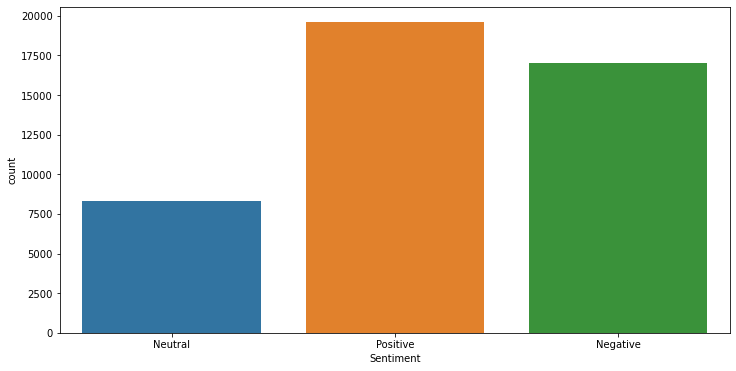

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df)

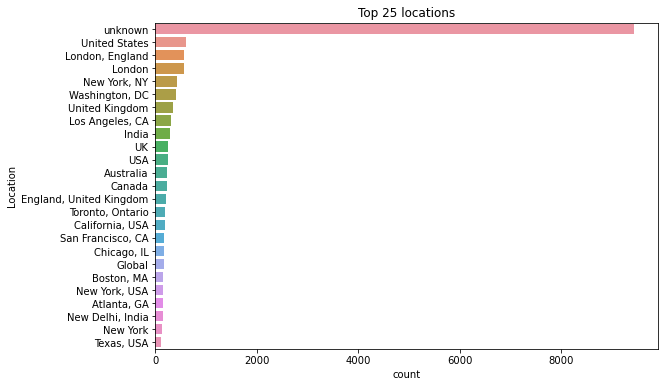

In [44]:
plt.figure(figsize=(9,6))
sns.countplot(y=df.Location, order = df.Location.value_counts().iloc[:25].index)
plt.title('Top 25 locations')
plt.show()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,sentiment,CleanTweet,CleanTweet2
29655,33454,78406,United States,05-04-2020,@kksheld @MarkYoungTruth Retail pharmacies wil...,Positive,2,kksheld markyoungtruth retail pharmacies presc...,"[@kksheld, @markyoungtruth, retail, pharmacies..."
18061,21860,66812,"Ontario, Canada",23-03-2020,Hey How about a story on an insider s view of ...,Positive,2,hey story insider view heightened perils worki...,"[hey, story, insider, view, heightened, perils..."



Sample Tweet Positive :
-------------------------------
advice talk neighbours family exchange phone numbers create conotact list phone numbers neighbours schools employer chemist gp set online shopping accounots poss adequate supplies regular meds not over order

Sample Tweet Negative :
--------------------------------------
me ready supermarket  covid19 outbreak not paranoid food stock litteraly empty    covid19  serious thing please not t panic causes shortage  covid19 france restezchezvous stayathome confinemenot link

Sample Tweet Neutral:
--------------------------------------
menyrbie phil  gahan chrisitv link link link

Tweets distribution for Disaster Tweets (1)  and Non-Disaster Tweets (0)
------------------------------------------------------------------------


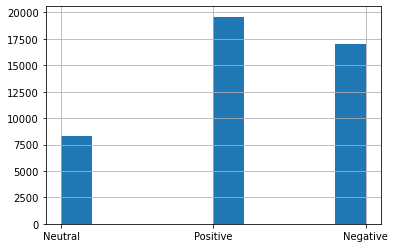

In [45]:
#Optional Step: Looking into data
display(df.sample(2)) #Sample rows of dataframe

print ( '\nSample Tweet Positive :\n-------------------------------')
print ( df[df['Sentiment']=='Positive'].CleanTweet.values[0] )

print ( '\nSample Tweet Negative :\n--------------------------------------')
print ( df[df['Sentiment']=='Negative'].CleanTweet.values[0] )

print ( '\nSample Tweet Neutral:\n--------------------------------------')
print ( df[df['Sentiment']=='Neutral'].CleanTweet.values[0] )

print ( '\nTweets distribution for Disaster Tweets (1)  and Non-Disaster Tweets (0)\n------------------------------------------------------------------------')
df['Sentiment'].hist() ;

# Most Common Words

In [54]:
from collections import Counter
cnt = Counter()
for text in df["CleanTweet"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('covid19', 49148),
 ('link', 25999),
 ('not', 8638),
 ('food', 8506),
 ('prices', 8349),
 ('store', 7918),
 ('supermarket', 7572),
 ('grocery', 7106),
 ('people', 6354),
 ('s', 5212)]

In [46]:
def get_n_words(corpus, direction, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
common_words = get_n_words(df['CleanTweet'], "top", 15)
rare_words = get_n_words(df['CleanTweet'], "bottom", 15)

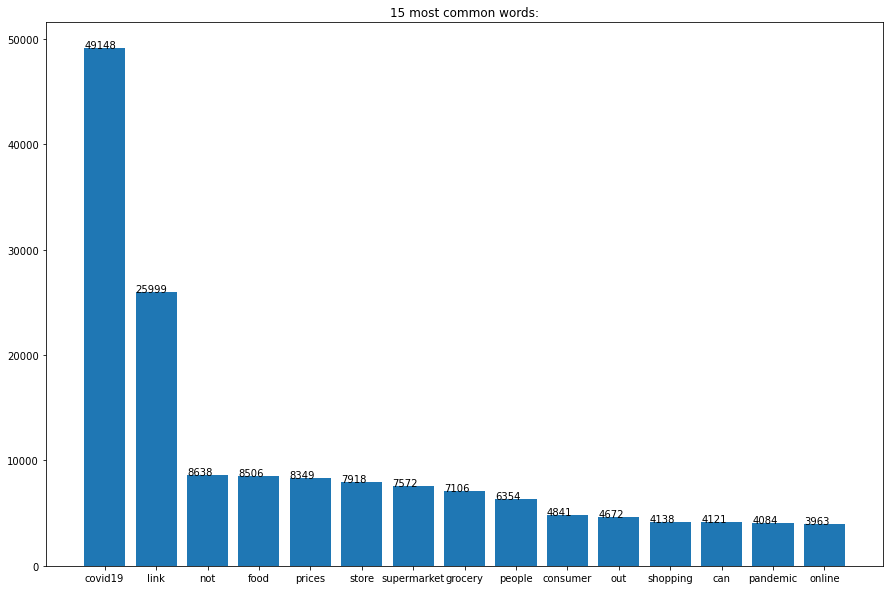

In [48]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

# Wordcloud

In [49]:
# Get all the pozitive and negative tweets
Positive = df[df.Sentiment =='Positive']
Negative = df[df.Sentiment=='Negative']
Neutral = df[df.Sentiment=='Neutral']
# Create numpy list to visualize using wordcloud
positive_text = " ".join(Positive.CleanTweet.to_numpy().tolist())
negative_text = " ".join(Negative.CleanTweet.to_numpy().tolist())
neutral_text = " ".join(Neutral.CleanTweet.to_numpy().tolist())

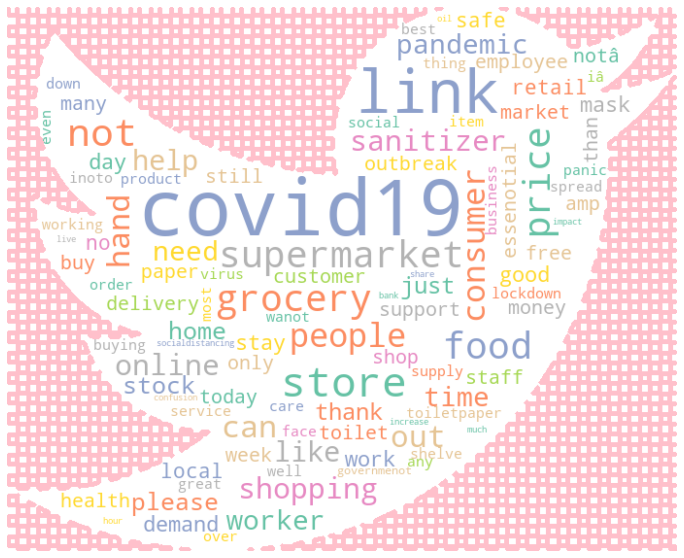

In [50]:
# wordcloud of pozitive messages
font_path = 'path/to/font'
mask = np.array(Image.open('indir.png'))
positive_cloud = WordCloud(width =520, height =260, stopwords=my_stopwords,max_font_size=80, 
                           contour_width=5, contour_color='pink', max_words=100,
                            background_color='white',colormap='Set2', collocations=False, mask=mask).generate(positive_text)
plt.figure(figsize=(16,10))
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

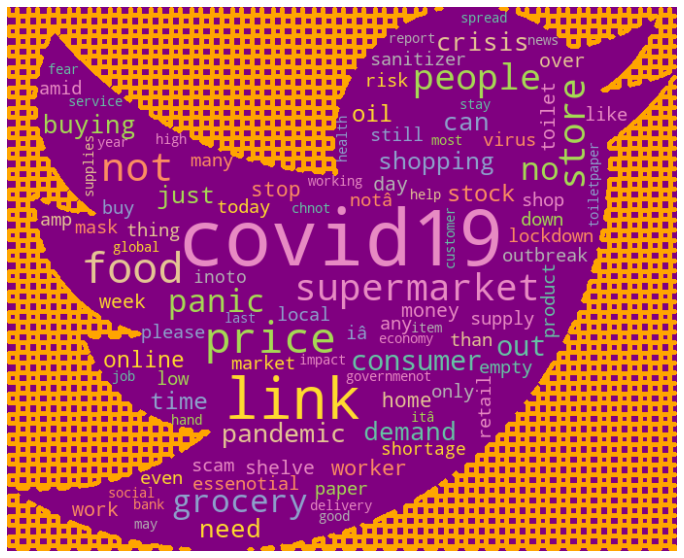

In [51]:
# wordcloud of neutral messages
font_path = 'path/to/font'
mask = np.array(Image.open('indir.png'))
positive_cloud = WordCloud(width =520, height =260, stopwords=my_stopwords,max_font_size=80, 
                           contour_width=5, contour_color='orange', max_words=100,
                            background_color='purple',colormap='Set2', collocations=False, mask=mask).generate(negative_text)
plt.figure(figsize=(16,10))
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

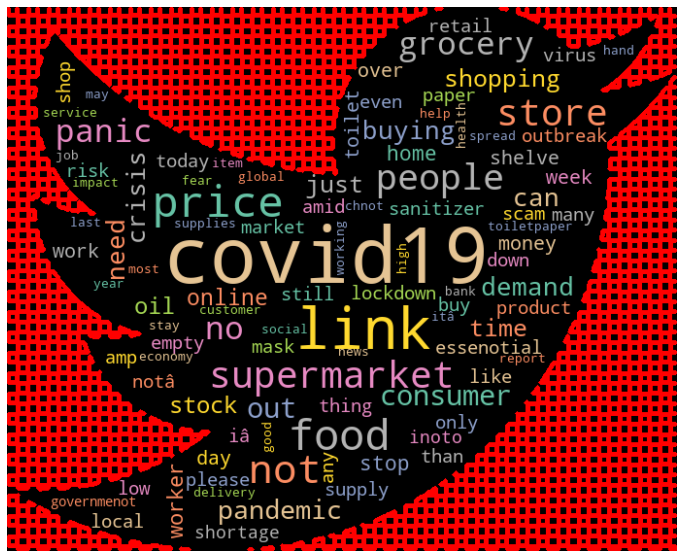

In [52]:
# wordcloud of negative messages

font_path = 'path/to/font'
mask = np.array(Image.open('indir.png'))
positive_cloud = WordCloud(width =520, height =260, stopwords=my_stopwords,max_font_size=80, 
                           contour_width=5, contour_color='red', max_words=100,
                            background_color='black',colormap='Set2', collocations=False, mask=mask).generate(negative_text)
plt.figure(figsize=(16,10))
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

In [53]:
# Get length column for each text
df['text_length'] = df['CleanTweet'].apply(len)
#Calculate average length by label types
labels = df.groupby('Sentiment').mean()
labels

,UserName,ScreenName,sentiment,text_length
Sentiment,,,,
Negative,21496.961952,66448.961952,0.0,141.057307
Neutral,23285.213994,68237.213994,1.0,112.294887
Positive,22987.511637,67939.511637,2.0,143.445743


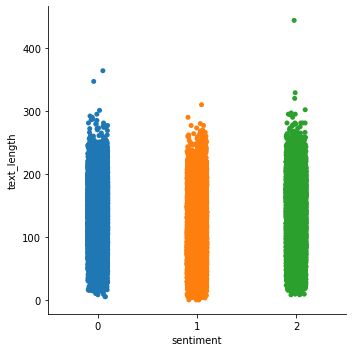

In [55]:
sns.catplot(x="sentiment", y="text_length",hue="sentiment", data=df);

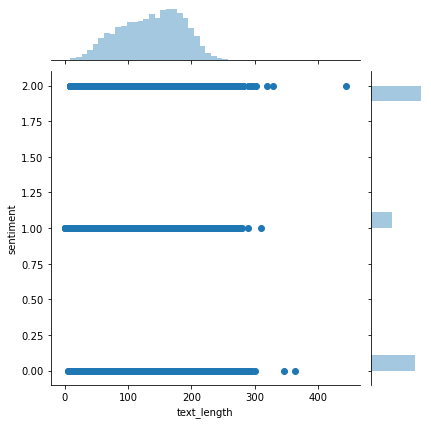

In [56]:
sns.jointplot(x=df['text_length'], y=df['sentiment']);

# Tokenize

In [57]:
df['CleanTweet'] = df['CleanTweet'].apply(word_tokenize)
display(df['CleanTweet'].head(5))

0    [menyrbie, phil, gahan, chrisitv, link, link, ...
1    [advice, talk, neighbours, family, exchange, p...
2    [covid19, australia, woolworths, elderly, disa...
3    [food, stock, not, only, empty, please, not, t...
4    [me, ready, supermarket, covid19, outbreak, no...
Name: CleanTweet, dtype: object

# Lemmatizer

In [58]:
lem = WordNetLemmatizer()
def lemma_wordnet(input):
    return [lem.lemmatize(w) for w in input]
df['CleanTweet'] = df['CleanTweet'].apply(lemma_wordnet)

In [59]:
display(df['CleanTweet'].head(5))

0    [menyrbie, phil, gahan, chrisitv, link, link, ...
1    [advice, talk, neighbour, family, exchange, ph...
2    [covid19, australia, woolworth, elderly, disab...
3    [food, stock, not, only, empty, please, not, t...
4    [me, ready, supermarket, covid19, outbreak, no...
Name: CleanTweet, dtype: object

In [60]:
# 2.8 Combine individual words
def combine_text(input):
    combined = ' '.join(input)
    return combined
df['CleanTweet'] = df['CleanTweet'].apply(combine_text)
df['CleanTweet']

0             menyrbie phil gahan chrisitv link link link
1       advice talk neighbour family exchange phone nu...
2       covid19 australia woolworth elderly disabled d...
3       food stock not only empty please not t panic e...
4       me ready supermarket covid19 outbreak not para...
                              ...                        
3793    supermarket israel people dance sing together ...
3794    panic buy lot non perishable item echo need fo...
3795    asst prof economics cconces nbcphiladelphia ta...
3796    gov need somethings instead biar je rakyat ass...
3797    forestandpaper member committed safety employe...
Name: CleanTweet, Length: 44955, dtype: object

# Vectorizer

We do the train/test split before the CountVectorizer to properly simulate the real world where our future data contains words we have not seen before
After you train your data and chose the best model, you would then train on all of your data before predicting actual future data to maximize learning.

- vect.fit(train) learns the vocabulary of the training data
- vect.transform(train) uses the fitted vocabulary to build a document-term matrix from the training data
- vect.transform(test) uses the fitted vocabulary to build a document-term matrix from the testing data (and ignores tokens it hasn't seen before)

In [61]:
train, test = train_test_split(df)

In [62]:
# 3.1 Bag of words

cv = CountVectorizer()
cv.fit(train)
X_train_bow = cv.fit_transform(train['CleanTweet']) #X_train
X_test_bow = train['sentiment'] #Y_train
Y_train_bow = cv.transform(test['CleanTweet']) #X_test
Y_test = test['sentiment'] # Y_test
# 3.2 TF-IDF

vectorizer = TfidfVectorizer(norm = None)
vectorizer.fit(train)
X_train_tfidf = vectorizer.fit_transform(train['CleanTweet'])
X_test_tfidf = train['sentiment'] #
Y_train_tdidf =vectorizer.transform(test['CleanTweet']) #vectorizer.fit_transform

# 3.3 Hashing

hv = HashingVectorizer()
hv.fit(train)
X_train_hash = hv.fit_transform(train['CleanTweet'])
X_test_hash = train['sentiment']
Y_train_hash = hv.transform(test['CleanTweet']) 

In [63]:
display("Bow-TF:IDF :", X_train_bow.shape)
df_tfidf = pd.DataFrame(X_train_bow.toarray(), columns=cv.get_feature_names())
display(df_tfidf.head())

'Bow-TF:IDF :'

(33716, 44893)

,aa,aaa,aaaaakubosan,aaaaas,aaaand,aaachatterjee,aaanews,aaannnddd,aabutan,aacounoty,...,âmoneycairandale,âmoneyxx,âmoneyâmoney,â²,â¾,ãcopyrightconomie,ãcopyrightpidãcopyrightmie,ãmoneyo,ã¼berweist,ã¼cretsiz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Rigde with bag of word

In [64]:
# Rigde with bag of word
from sklearn import linear_model
alpha = [80.0, 90.0, 100.0, 110.0, 120.0] 
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = sklearn.model_selection.cross_val_score(ridge, X_train_bow, X_test_bow, cv=5)#scoring='f1' kaldirdim multiclass hatasina karsilik
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  80.0
[0.77802491 0.76820406 0.77146671 0.77680558 0.77057689]
0.7730156302858954


alpha:  90.0
[0.77550415 0.76701765 0.76612784 0.77309803 0.76879727]
0.7701089869745859


alpha:  100.0
[0.77239027 0.76286519 0.7634584  0.76968708 0.76419991]
0.7665201723187651


alpha:  110.0
[0.76690391 0.75945425 0.75930595 0.76716595 0.76138217]
0.7628424468659472


alpha:  120.0
[0.76364176 0.75767463 0.7554501  0.76494142 0.75856444]
0.760054467099047




# MultinomialNB with bag of word

In [65]:
# MultinomialNB with bag of word
from sklearn.naive_bayes import MultinomialNB
alpha = [1e-10, 1e-5, 0.1, 1.0, 2.0, 5.0]
for a in alpha:
    mnb = MultinomialNB(a)
    scores = sklearn.model_selection.cross_val_score(mnb, X_train_bow, X_test_bow, cv=5)
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1e-10
[0.62396204 0.62687231 0.61930891 0.62094023 0.62005042]
0.6222267844567602


alpha:  1e-05
[0.62618624 0.62909684 0.62108854 0.62331307 0.62257156]
0.6244512476274767


alpha:  0.1
[0.66918743 0.66691384 0.66498591 0.65771912 0.66617233]
0.6649957233449248


alpha:  1.0
[0.6856465  0.68293045 0.67610856 0.67788818 0.67269761]
0.6790542593355896


alpha:  2.0
[0.66948399 0.66468931 0.66142666 0.66528252 0.66068515]
0.6643135256121677


alpha:  5.0
[0.64916963 0.64555836 0.64971081 0.64600326 0.6412576 ]
0.6463399326818251




# MultinomialNB with TF-IDF

In [66]:
# MultinomialNB with TF-IDF
alpha = [175.0, 200.0, 225.0, 250.0, 300.0]
for a in alpha:
    mnb = MultinomialNB(a)
    scores = sklearn.model_selection.cross_val_score(mnb, X_train_tfidf, X_test_tfidf, cv=5)
    print('alpha: ', a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  175.0
[0.63701068 0.63221118 0.64229571 0.63517722 0.63517722]
0.6363744027680214


alpha:  200.0
[0.63508304 0.63102477 0.64036779 0.6338425  0.63206288]
0.6344761950752849


alpha:  225.0
[0.63211744 0.62954175 0.63814326 0.63117307 0.62939345]
0.6320737915634667


alpha:  250.0
[0.63137604 0.62672401 0.63799496 0.63028326 0.62791043]
0.630857737623077


alpha:  300.0
[0.62752076 0.62331307 0.63413911 0.62687231 0.62494439]
0.6273579261231145




# Rigde with Hash

In [67]:
# Rigde with Hash
alpha = [1.1, 1.2, 1.3, 1.4, 1.5, 2.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = sklearn.model_selection.cross_val_score(ridge, X_train_hash, X_test_hash, cv=5)
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  1.1
[0.79908066 0.78763162 0.79311879 0.79667804 0.79089426]
0.7934806738643245


alpha:  1.2
[0.79848754 0.78852143 0.79163577 0.79697464 0.79015275]
0.7931544271824267


alpha:  1.3
[0.7987841  0.78941124 0.79104256 0.79608483 0.79089426]
0.7932433995519979


alpha:  1.4
[0.79937722 0.78718671 0.78970785 0.79756785 0.78970785]
0.7927094949659143


alpha:  1.5
[0.7995255  0.78674181 0.78911464 0.79682634 0.78955954]
0.7923535659052602


alpha:  2.0
[0.79492883 0.78199614 0.7864452  0.7940086  0.78525879]
0.7885275121214409




# Rigde with TF-IDF

In [68]:
# Rigde with TF-IDF
alpha = [500.0, 1500.0, 2500.0, 3000.0]
for a in alpha:
    ridge = linear_model.RidgeClassifier(a)
    scores = sklearn.model_selection.cross_val_score(ridge, X_train_tfidf, X_test_tfidf, cv=5)
    print("alpha: ",a)
    print(scores)
    print(np.mean(scores))
    print('\n')

alpha:  500.0
[0.78143535 0.77042859 0.78110633 0.78140294 0.78080973]
0.7790365880068236


alpha:  1500.0
[0.79137011 0.78258935 0.79163577 0.79178407 0.78896634]
0.7892691273882023


alpha:  2500.0
[0.78988731 0.7788818  0.78511048 0.78881803 0.78258935]
0.7850573961943577


alpha:  3000.0
[0.78721827 0.77547086 0.78125463 0.78540709 0.7782886 ]
0.7815278891215158




# Ridge Classifier w/Hash Vectorization 

For multi-class classification, n_class classifiers are trained in a one-versus-all approach. Concretely, this is implemented by taking advantage of the multi-variate response support in Ridge.

In [69]:
from sklearn.metrics import accuracy_score
ridge = linear_model.RidgeClassifier(1.4)
ridge.fit(X_train_hash, X_test_hash)
test['sentiment_pred'] = ridge.predict(Y_train_hash)
y_true = test['sentiment']
y_pred = test['sentiment_pred']
accuracy_score(y_true, y_pred)


0.8031853367737343

In [70]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(y_true, y_pred, target_names = ['Negative Tweets','Neutral Tweets', 'Positive Tweets']))

                 precision    recall  f1-score   support

Negative Tweets       0.80      0.83      0.82      4192
 Neutral Tweets       0.77      0.61      0.68      2095
Positive Tweets       0.81      0.86      0.83      4952

       accuracy                           0.80     11239
      macro avg       0.80      0.77      0.78     11239
   weighted avg       0.80      0.80      0.80     11239



Text(59.99999999999999, 0.5, 'Actual')

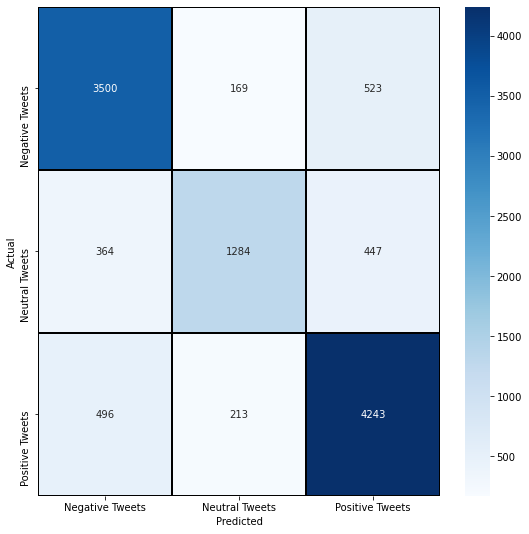

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize = (9,9))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Tweets','Neutral Tweets', 'Positive Tweets'], 
            yticklabels = ['Negative Tweets','Neutral Tweets', 'Positive Tweets'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# DecisionTreeClassifier

In [72]:

dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(X_train_bow,train['sentiment'])
preddt = dtclassifier.predict(Y_train_bow) 

In [73]:
accuracy= accuracy_score(preddt,Y_test)
print(accuracy)

0.671945902660379


In [74]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None) 
dtclassifier.fit(X_train_tfidf,train['sentiment'])
preddt = dtclassifier.predict(Y_train_tdidf) 

In [75]:
accuracy= accuracy_score(preddt,Y_test)
print(accuracy)

0.6702553607972239


In [76]:
dtclassifier=DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtclassifier.fit(X_train_hash,train['sentiment'])
preddt = dtclassifier.predict(Y_train_hash) 

In [77]:
accuracy= accuracy_score(preddt,Y_test)
print(accuracy)

0.613310792775158


# SVM

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
vectors = vectorizer.fit_transform(df['CleanTweet']) #all data bunu boyle yaptik cunku matrrislerde uyumsuzluk olsun isteemiyoruz. islemde sorun yasayabilirim cunku.
#test_vectors = vectorizer.transform(al['Sentiment'])

In [79]:
test_vectors = vectors[40000:]
train_vectors = vectors[:40000]

In [80]:
# Perform classification with SVM, kernel=linear
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, df['Sentiment'][:40000])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

# results
print("Results for SVC(kernel=linear)")
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(df['Sentiment'][40000:], prediction_linear, output_dict=True)
print('positive: ', report['Positive'])
print('negative: ', report['Negative'])
print('notr: ', report['Neutral'])

Results for SVC(kernel=linear)
Training time: 631.379639s; Prediction time: 25.234289s
positive:  {'precision': 0.8338918142651986, 'recall': 0.8439922480620154, 'f1-score': 0.8389116301468816, 'support': 2064}
negative:  {'precision': 0.831532416502947, 'recall': 0.830308974987739, 'f1-score': 0.830920245398773, 'support': 2039}
notr:  {'precision': 0.7626506024096386, 'recall': 0.7429577464788732, 'f1-score': 0.7526753864447087, 'support': 852}


In [81]:
review = """I can help"""
review_vector = vectorizer.transform([review]) # vectorizing
print(classifier_linear.predict(review_vector))

['Positive']


In [82]:
Y_train_hash

<11239x1048576 sparse matrix of type '<class 'numpy.float64'>'
	with 189967 stored elements in Compressed Sparse Row format>

# Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")
log_reg.fit(X_train_hash, X_test_hash)

LogisticRegression(multi_class='ovr')

In [84]:
train_accuracy = log_reg.score(X_train_hash, X_test_hash)
test_accuracy = log_reg.score(Y_train_hash, Y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.84
Accuracy on Test Data  : 0.78


In [85]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train_hash, X_test_hash)

train_accuracy = log_reg_mnm.score(X_train_hash, X_test_hash)
test_accuracy = log_reg_mnm.score(Y_train_hash, Y_test)

print('Multinomial (Softmax)', '-'*20, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

Multinomial (Softmax)
--------------------
Accuracy on Train Data : 0.86
Accuracy on Test Data  : 0.79


In [86]:

C_values = [0.001,0.01, 0.1,1,10,100, 1000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0, solver='lbfgs', multi_class='multinomial')
    lr.fit(X_train_hash, X_test_hash)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': lr.score(X_train_hash, X_test_hash),
                                              'Test Accuracy': lr.score(Y_train_hash, Y_test)
                                             }, ignore_index=True)
display(accuracy_values)    

,C_values,Train Accuracy,Test Accuracy
0,0.001,0.473040,0.480381
1,0.010,0.594050,0.590177
2,0.100,0.727310,0.703087
3,1.000,0.863329,0.794288
4,10.000,0.916508,0.811282
5,100.000,0.919830,0.808435
6,1000.000,0.916064,0.803719


# Grid Search 

### hypermater optimization

In [87]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }

In [88]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X_train_hash, X_test_hash)

GridSearchCV(cv=10, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [89]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 10, 'penalty': 'l2'}
Best Score      :  0.8175346872159543


In [90]:


%time results = grid_cv.cv_results_

df1 = pd.DataFrame(results)
display(df1.head(35))
df1.info()

CPU times: user 10 µs, sys: 1e+03 ns, total: 11 µs
Wall time: 15.3 µs


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003646,0.001334,0.000000,0.000000,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,10.793813,0.539352,0.034849,0.007610,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.434164,0.434164,0.434164,0.434164,0.434164,0.434164,0.434292,0.434292,0.434292,0.434292,0.434215,0.000063,9
2,0.005314,0.002123,0.000000,0.000000,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
3,10.342319,0.574801,0.032057,0.006394,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.434164,0.434164,0.434164,0.434164,0.434164,0.434164,0.434292,0.434292,0.434292,0.434292,0.434215,0.000063,9
4,0.003781,0.001270,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
5,10.647283,0.419026,0.030617,0.007583,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.436240,0.436833,0.436240,0.437129,0.435647,0.435350,0.436369,0.436962,0.438149,0.438446,0.436736,0.000942,8
6,0.003544,0.001527,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
7,15.894372,0.881961,0.035212,0.006745,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.572361,0.563760,0.566133,0.559609,0.557533,0.557829,0.572827,0.558885,0.559775,0.562741,0.563145,0.005384,7
8,0.003362,0.001552,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
9,32.531948,4.317483,0.033972,0.009890,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.675267,0.669929,0.674970,0.671115,0.670522,0.669929,0.676357,0.676061,0.667754,0.664491,0.671640,0.003737,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      20 non-null     float64
 1   std_fit_time       20 non-null     float64
 2   mean_score_time    20 non-null     float64
 3   std_score_time     20 non-null     float64
 4   param_C            20 non-null     object 
 5   param_penalty      20 non-null     object 
 6   params             20 non-null     object 
 7   split0_test_score  10 non-null     float64
 8   split1_test_score  10 non-null     float64
 9   split2_test_score  10 non-null     float64
 10  split3_test_score  10 non-null     float64
 11  split4_test_score  10 non-null     float64
 12  split5_test_score  10 non-null     float64
 13  split6_test_score  10 non-null     float64
 14  split7_test_score  10 non-null     float64
 15  split8_test_score  10 non-null     float64
 16  split9_test_score  10 non-nu

In [91]:
df1 = df1[['param_penalty','param_C', 'mean_test_score']]
df1 = df1.sort_values(by='mean_test_score', ascending = False)
df1

,param_penalty,param_C,mean_test_score
13,l2,10,0.817535
15,l2,100,0.810506
17,l2,1000,0.797159
19,l2,10000,0.793896
11,l2,1,0.774973
9,l2,0.1,0.671640
7,l2,0.01,0.563145
5,l2,0.001,0.436736
1,l2,1e-05,0.434215
3,l2,0.0001,0.434215


In [92]:
#Y = df['sentiment']
#X = df['CleanTweet']
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.80, random_state = 25, stratify=Y)

#print("Proportion of Negative sentences in all data     : %{:.0f} ".format(len(Y[Y==0])/len(Y)*100))
#print("Proportion of Neural sentences in all data       : %{:.0f} ".format(len(Y[Y==1])/len(Y)*100))
#print("Proportion of Positive sentences in all data     : %{:.0f} ".format(len(Y[Y==2])/len(Y)*100))
#print("Proportion of Negative sentences training set    : %{:.0f} ".format(len(Y_train[Y_train==0])/len(Y_train)*100))
#print("Proportion of Negative sentences test set        : %{:.0f} ".format(len(Y_test[Y_test==0])/len(Y_test)*100))

#Elimizdeki datayı train,test diye ayırırken bir yüzde belirliyoruz. Mesela bu örnekte (test_size=0.2) %80 train , %20 test olarak ayrılmış.
#Python bu datayı her seferinde farklı yerlerinden böler.
#Eğer bir random_state değeri belirlersek her seferinde o değere göre böler. Yani aynı test verileriyle test etmiş oluruz. 